<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Regressão
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever o peso do penguin (**body_mass_g**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [64]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [65]:
penguim = sns.load_dataset('penguins')

In [66]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Analise exploratoria** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos por sexo:

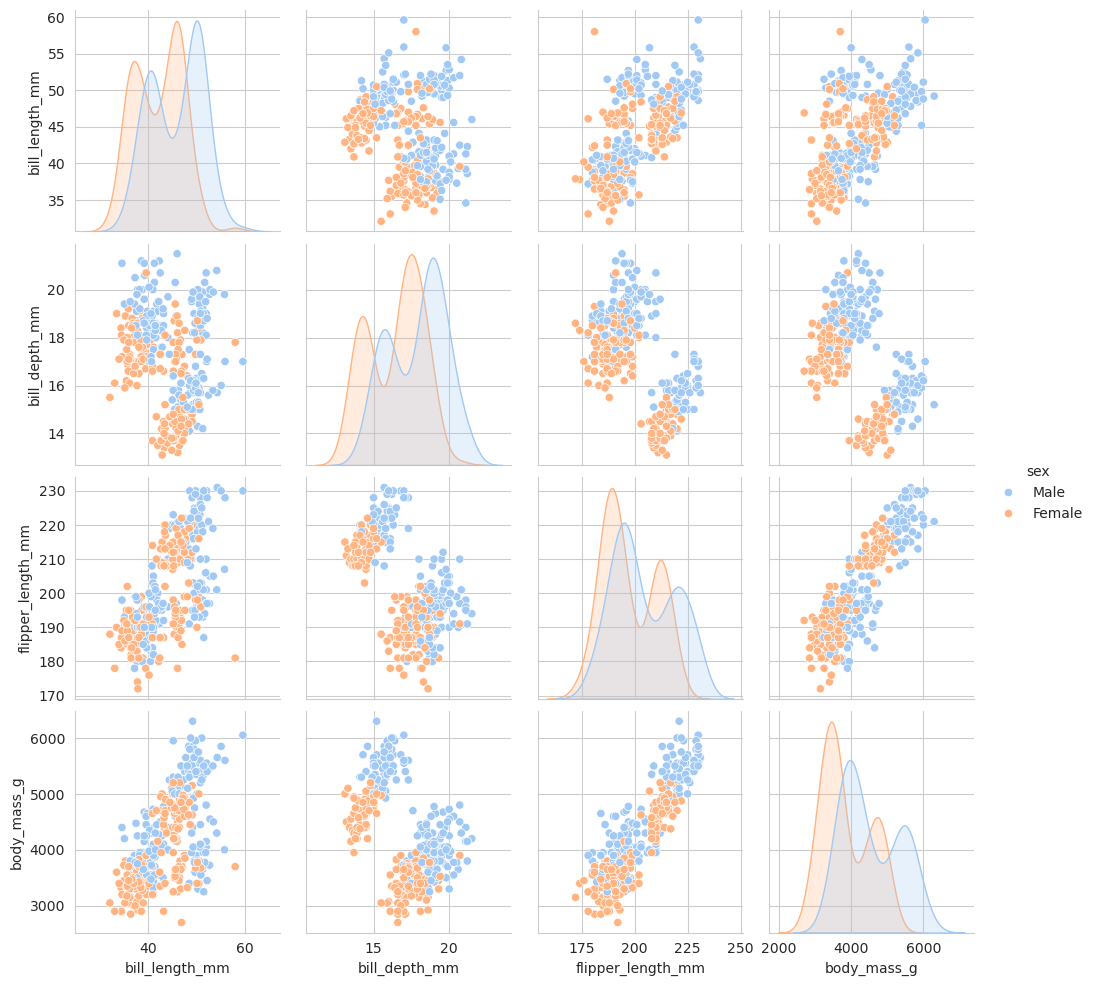

In [4]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="sex", palette="pastel")

**Comentário:** Percebe-se através da leitura dos gráficos algumas informações que podem em um primeiro momento parecer óbvias, mas uma prevalência de fêmeas com tamanho menor em todas as características. Seja a massa corporal, profundidade e comprimento do bico ou das asas. No entanto, existem blocos bem estabelecidos nas correlações, que não podem ser explicados apenas por questões relacionadas ao sexo dos pinguins.

 - Atributos por espécie:

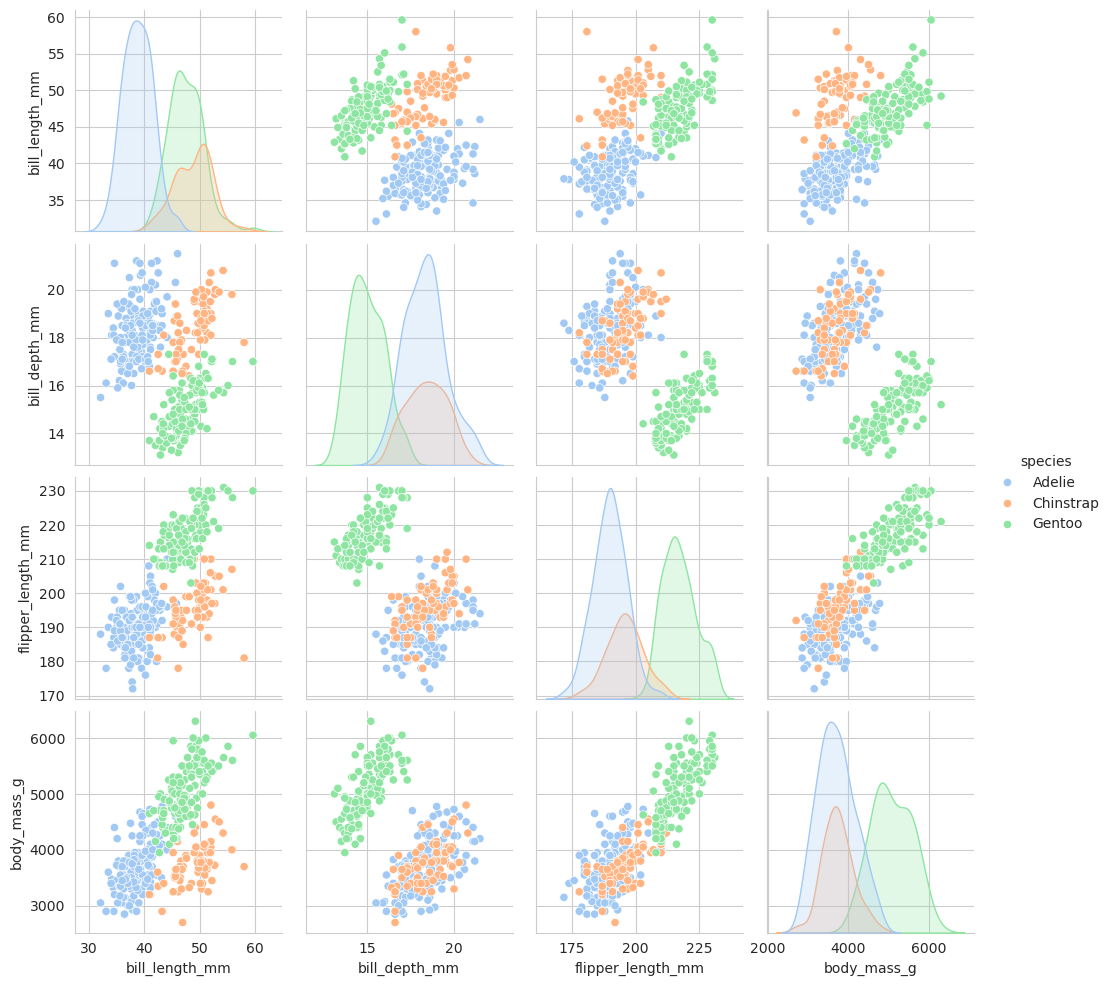

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="species", palette="pastel")

**Comentário:** Através das características de espécies, é possível estabelecer algumas relações. Os pinguins da espécie Gentoo são os maiores em massa, mas possuem os bicos menos profundos, também possuem asas mais longas. Os Adelie e Chinstrap compartilham de muitas características em comum, no entanto divergem no comprimento do bico, onde o segundo tem números maiores.

 - Atributos por ilha:

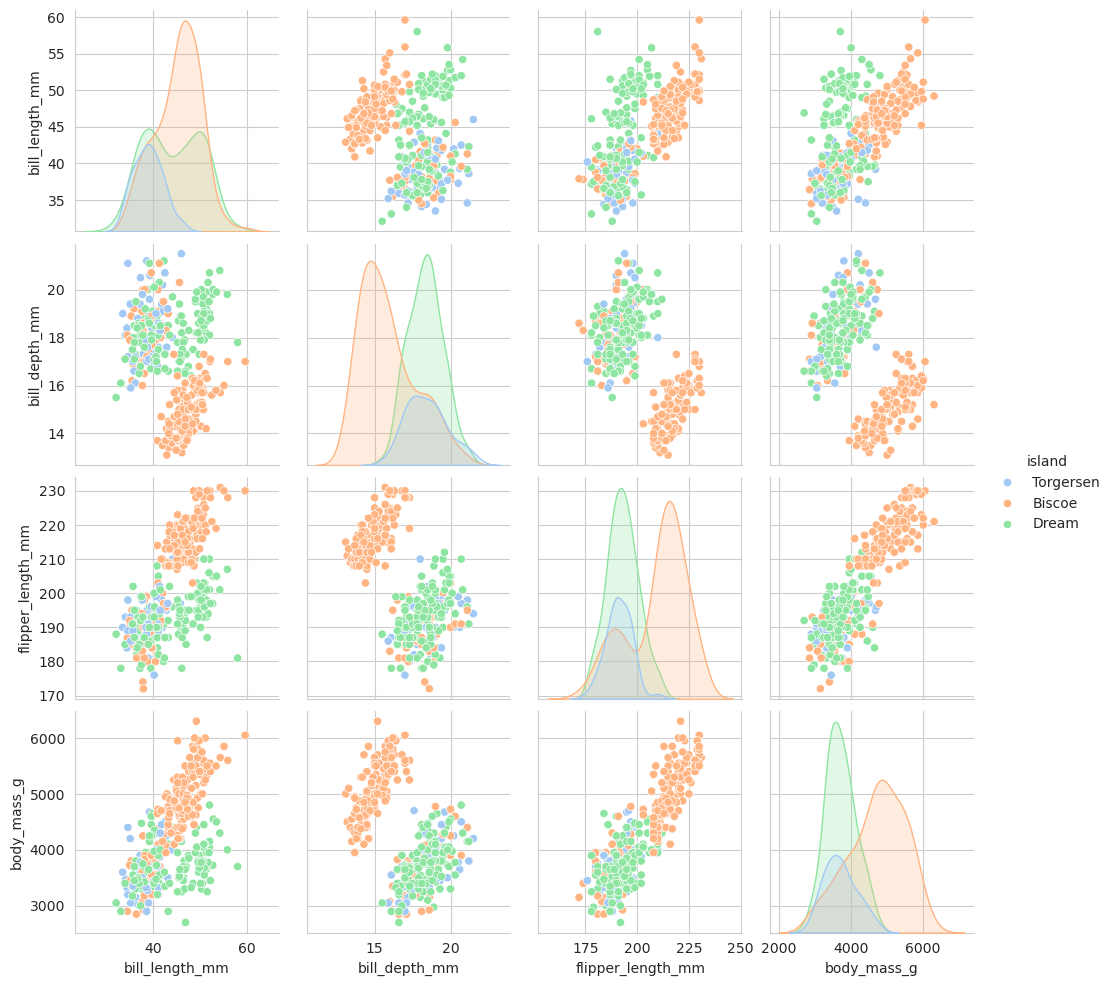

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="island", palette="pastel")

**Comentário:** Neste gráfico, observa-se a distribuição das espécies por ilha. Podemos notar a presença de um número maior de Gentoo's na ilha de Biscoe por conta da concentração maior de espécimes maiores. Na ilha dream podemos encontrar os Adelie e Chinstrap, sendo o primeiro em maior número.

## 2\. Dados 

### **2.1. Valores nulos** 

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Carregar dataframe e excluir valores
df = sns.load_dataset('penguins')
df_limpo = df.dropna()
df_limpo.head()



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### **2.2. Variáveis numéricas** 

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [107]:
# Identificação
numerical_cols = df_limpo.select_dtypes(include=['float64', 'int64']).columns.drop('body_mass_g')

# Normalização
for col in numerical_cols:
    mean = df_limpo[col].mean()
    std = df_limpo[col].std()
    df_limpo = df_limpo.assign(**{col + '_std': (df_limpo[col] - mean) / std})

# Limpeza
df_limpo = df_limpo.drop(columns=[col for col in numerical_cols])

print(df_limpo.head())

  species     island  body_mass_g     sex  bill_length_mm_std  \
0  Adelie  Torgersen       3750.0    Male           -0.894695   
1  Adelie  Torgersen       3800.0  Female           -0.821552   
2  Adelie  Torgersen       3250.0  Female           -0.675264   
4  Adelie  Torgersen       3450.0  Female           -1.333559   
5  Adelie  Torgersen       3650.0    Male           -0.858123   

   bill_depth_mm_std  flipper_length_mm_std  
0           0.779559              -1.424608  
1           0.119404              -1.067867  
2           0.424091              -0.425733  
4           1.084246              -0.568429  
5           1.744400              -0.782474  


### **2.3. Variáveis categóricas** 

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

In [108]:
# Identificar as variáveis categóricas(embora só tenha nominal)
categorical_cols = df_limpo.select_dtypes(include=['object']).columns

# Aplicar a técnica de One-Hot Encoding utilizando o 'dummies' junto da limpeza
for col in categorical_cols:
    dummies = pd.get_dummies(df_limpo[col], prefix=col + '_nom')
    df_limpo = pd.concat([df_limpo, dummies], axis=1)
    df_limpo.drop(columns=[col], inplace=True)

# Conversão dos valores booleanos em 0's e 1's
df_limpo = df_limpo.astype({col: int for col in df_limpo.columns if df_limpo[col].dtype == 'bool'})

df_limpo.head()

,body_mass_g,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,species_nom_Adelie,species_nom_Chinstrap,species_nom_Gentoo,island_nom_Biscoe,island_nom_Dream,island_nom_Torgersen,sex_nom_Female,sex_nom_Male
0,3750.0,-0.894695,0.779559,-1.424608,1,0,0,0,0,1,0,1
1,3800.0,-0.821552,0.119404,-1.067867,1,0,0,0,0,1,1,0
2,3250.0,-0.675264,0.424091,-0.425733,1,0,0,0,0,1,1,0
4,3450.0,-1.333559,1.084246,-0.568429,1,0,0,0,0,1,1,0
5,3650.0,-0.858123,1.744400,-0.782474,1,0,0,0,0,1,0,1


### **2.4. Treino/Teste** 

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes. 

In [109]:
# Separar treino x teste
X = df_limpo.drop('body_mass_g', axis=1)
y = df_limpo['body_mass_g']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 3\. Modelagem 

### **3.1. Treino** 

Treine um modelo de **regressão linear** com os **dados de treino** (2/3).

In [110]:
# Treino
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### **3.2. Avaliação** 

Calcule o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui um RMSE de approx. 296g, 7% da média do peso, uma performance razoável (seu RMSE pode não ser igual).

In [111]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 266.50


## 4\. Predição  

### **4.1. Novo penguim** 

Qual o peso de um penguim com as seguintes características:


| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm | sex |
| --- | --- | --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2 e 2.3

> **Nota:** Como referência eu obtive um peso predito de 3786.16g (a sua predição pode não ser igual).

In [113]:
# Carregar dataset original 
df = sns.load_dataset('penguins')
df_limpo = df.dropna().copy()

# Identificar colunas numéricas
numerical_cols = df_limpo.select_dtypes(include=['float64', 'int64']).columns.drop('body_mass_g')

# Normalização padrão das variáveis numéricas e cálculo de média e std
means = {}
stds = {}
for col in numerical_cols:
    mean = df_limpo[col].mean()
    std = df_limpo[col].std()
    df_limpo[col + '_std'] = (df_limpo[col] - mean) / std
    means[col] = mean
    stds[col] = std

# Imprimir médias e desvios padrão
print("Médias:")
for col, mean in means.items():
    print(f"{col}: {mean:.2f}")

print("\nDesvios padrão:")
for col, std in stds.items():
    print(f"{col}: {std:.2f}")

Médias:
bill_length_mm: 43.99
bill_depth_mm: 17.16
flipper_length_mm: 200.97

Desvios padrão:
bill_length_mm: 5.47
bill_depth_mm: 1.97
flipper_length_mm: 14.02


In [115]:
# Preparar dados, agora conhecendo os números de média e desvio padrão
bill_length_mm_std_n = (38.2 - 43.99) / 5.47
bill_depth_mm_std_n = (18.1 - 17.16) / 1.97
flipper_length_mm_std_n = (185.0 - 200.97) / 14.02

data = {
    'species': ['Adelie'],
    'island': ['Biscoe'],
    'bill_length_mm': [38.2],
    'bill_depth_mm': [18.1],
    'flipper_length_mm': [185.0],
    'sex': ['Male']
}

# Criar array com os dados já preparados
data = np.array([bill_length_mm_std_n, bill_depth_mm_std_n, flipper_length_mm_std_n, 1, 0, 0, 1, 0, 0, 0, 1])

# Rodar modelo preditivo treinado no dataframe do primeiro exercício
body_mass_g_n = model.predict(data.reshape(1, -1))
print(body_mass_g_n)


[3752.47203239]


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


---